<figure>
<IMG SRC="images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Week 2: Statistics of Bivariate Variables


<figure>
<IMG SRC="http://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Okuns_law_quarterly_differences.svg/1280px-Okuns_law_quarterly_differences.svg.png" WIDTH=320 ALIGN="right" STYLE="padding-left:20px" ALT="The Trouble with QSAR (or How I Learned To Stop Worrying and Embrace Fallacy) DOI: 10.1021/ci700332k">
</figure>

We often collect data sets, rather than just single variables.  Often we do so because we think they are related.  For instance, we might look at economic indicators and think that Gross Domestic Product and Unemployment are related, and indeed they are, as shown on the right.  


<figure>
<IMG SRC="images/mexican_lemons_thumb2.jpg" STYLE="padding-left:20px" WIDTH=320 ALIGN="right" ALT="The Trouble with QSAR (or How I Learned To Stop Worrying and Embrace Fallacy) DOI: 10.1021/ci700332k">
</figure>

Of course, terrible lies can be told by fitting ill-conditioned data; don't worry, the plot on the right (DOI:10.1021/ci700332k) was making the same point.  So, as scientists we alsways have to be careful to traet the data fairly.  There are some more fun examples at [Spurious Correlations](http://www.tylervigen.com).

(The error made in those correlations, not shared by the economic plot above, is that they correlated data sets with long term trends that had nothing to do with each other.  The economic plot removes the large-scale trends by considering the derivative of the data, often a good idea to test true correlation between two time series.)

## Correlation

We are often interested in whether two variables are "correlated" or not, and there are formal methods of measuring the degree of correlation.  First, we define the joint probability density.

### Joint probability density

So now we consider two random variables, $\{x(k)\}$ and $\{y(k)\}$.  These of course have their individual *probability density functions*, $p(x)$, and $p(y)$.  However we can also consider their **joint probability density** $p(x,y)$ defined in the same way as the univariate probability:

\begin{equation}
    p(x,y) = \displaystyle\lim_{\Delta y\to 0}  \displaystyle\lim_{\Delta x\to 0} \frac{1}{ \Delta x \Delta y}\mathrm{prob}\left[ x\lt x(k)\lt x+\Delta x; \ y\lt y(k)\lt y+\Delta y\right] 
\end{equation}

Note that $0\leq p(x,y) \leq 1$.  

From this definition, the probability that $a\leq x\leq b$ *and* $c\leq y\leq d$ is given by the double integral:

\begin{equation}
    \mathrm{prob}[a\leq x\leq b; c\leq y\leq d]=\int_c^d\int_a^b p(x,y) \mathrm{d}x\mathrm{d}y
\end{equation}

If we integrate one of the dimensions from $-\infty$ to $\infty$, then we recover the one-dimensional probability density of the other variable.  i.e.:

\begin{equation}
    p(x)=\int_{-\infty}^{\infty} p(x,y)\,\mathrm{d}y
\end{equation}

and of course the integral of the total domain is unity:
\begin{equation}
    \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} p(x,y)\,\mathrm{d}x\mathrm{d}y=1
\end{equation}



#### Example: Two Dice

For example, lets consider two dice rolled at the same time.  These would have a joint probability density of 

\begin{equation}
    p(x,y) = \frac{1}{36} \sum_{x_i=1}^6\sum_{y_i=1}^6 \delta(x_i,y_i)
\end{equation}

We can represent this graphically as

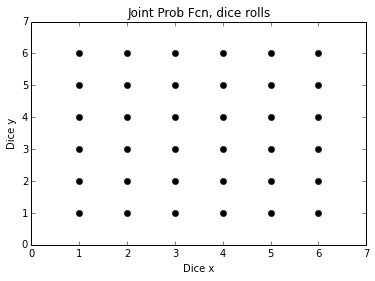

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,7.,1.)
y = np.arange(1,7.,1.)
fig,ax=plt.subplots(1,1)
for i in range(6):
    ax.plot(i+1.+0.*y,y,'k.',markersize=12)
ax.set_xlim([0,7]);ax.set_ylim([0,7])
ax.set_xlabel('Dice x');ax.set_ylabel('Dice y');ax.set_title('Joint Prob Fcn, dice rolls')

where each dot represents a $\delta(x)$ function with amplitude $1/36$.  This is a somewhat clunky representation, and if we had discrete variables like this we might just make a table.

As, expected, integrating gives us the original probability of each roll on a single dice:

\begin{equation}
    \int_{-\infty}^{\infty} p(x,y)\ \mathrm{d}y = \frac{1}{6} \sum_{x_i=1}^6 \delta(x_i)
\end{equation}


### Independent variables

The example above is an example of two independent variables.  The probability of a certain value of $x$ being rolled, $p(x)$, does not depend on a certain value of $y$ being rolled.  Formally, we say two variables are independent if their joint PDF can be written as the product of their individual PDFs:

\begin{equation}
    p(x,y)=p(x)p(y)
\end{equation}

We see that graphically above in that the probability densities do not depend on each other.  We can also see it from the form of the joint PDF:

\begin{align}
    p(x,y) & = \frac{1}{36} \sum_{x_i=1}^6\sum_{y_i=1}^6 \delta(x_i)\delta(y_i)\\
    &= \frac{1}{6} \sum_{x_i=1}^6 \delta(x_i)\ \  \frac{1}{6}\sum_{y_i=1}^6\delta(y_i)\\
    &= p(x)p(y)
\end{align}


#### Example: Not independent variables

Lets construc a pair of random variables that are not independent.  Suppose we roll the dice, and call the result $x_k$, and we flip a coin and define $y_x=x_k+1$ if we get keads and $y_k=x_k-1$ if we get tails.  Hopefully it is obvious that $y_k$ and $x_k$ are not independent.  

We can write out the math for this:

\begin{equation}
    p(x,y) = \frac{1}{6}\frac{1}{2}\sum_{x_i=1}^6 \left[\delta(x-x_i,x-x_i+1)+\delta(x-x_i,x-x_i-1)\right]
\end{equation}

and plot it:

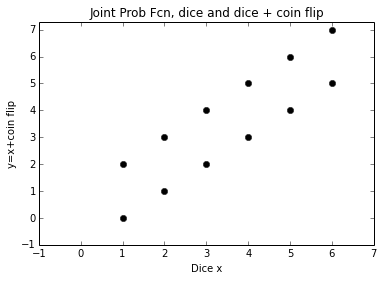

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,7.,1.)
y = np.array([-1.,1.])
fig,ax=plt.subplots(1,1)
for i in range(6):
    ax.plot(i+1.+0.*y,y+i+1,'k.',markersize=12)
ax.set_xlim([-1,7]);ax.set_ylim([-1,7.3])
ax.set_xlabel('Dice x');ax.set_ylabel( 'y=x+coin flip');ax.set_title('Joint Prob Fcn, dice and dice + coin flip')

This example is not independent, as should be clear graphically, and there is no way to remove $x_i$ from the expression for the $y$-dependence of the probability function, so $p(x,y)\neq p(x)p(y)$.

#### Properties of independent variables:

If variables are independent then the mean of their products is the product of their means:

\begin{align}
E(x,y) &= \int\int p(x,y) \ \mathrm{d}x\mathrm{d}y\\
    &= \int\int p(x)p(y) \ \mathrm{d}x\mathrm{d}y\\
    &= \int p(x)\ \mathrm{d}x\, \int p(y)\ \mathrm{d}y\\
    &= E(x)E(y)
\end{align}

and the variance of their sum squared is the sum of their variances.  If $x_1$ and $x_2$ have zero mean:

\begin{align}
    E((x_1+x_2)^2) &= E(x_1^2+x_2^2+2x_1x_2)\\
    &= E(x_1^2)+E(x_2^2)+2E(x_1)E(x_2)\\
    &= E(x_1^2)+E(x_2^2)
\end{align}

### Correlation co-efficient

The **Linear Correlation Co-efficient** is defined as

\begin{equation}
    C_{xy} \equiv \frac{1}{\sigma_x\sigma_y}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} p(x,y) (x-\mu_x)(y-\mu_y)\ \mathrm{d}x\,\mathrm{d}y
\end{equation}

where $\mu_x$ is the *mean* of $x$, and $\sigma_x^2$ is the *variance*.  Note that $-1\leq C_{xy}\leq+1$.  

We say that two variables are **linearly uncorrelated** when $C_{xy}=0$.  

Note my use of the qualifier "linear" in both definitions.  That is beacause this only tests if the variables are linearly uncorrelated to each other, and does not tell us if they are independent.  It is trivial to come up with an example of two dependent variables that are *linearly uncorrelated*, $C_{xy}=0$.

#### Ex: Linearly uncorrelated, but not independent

Suppose $x_k$ is a variable governed by a normal distribution, mean zero, standard deviation 1, $N(0,1)$.  If $y_k=x_k^2$, clearly these are not independent ($p(x,y)\neq p(x)p(y)$).  However, the linear correlation co-efficient is zero!

\begin{align}
    C_{xy} = \frac{E(xy)}{\sigma_x\sigma_y}= \frac{E(x^3)}{\sigma_x\sigma_y}=0
\end{align}

because the cube of the Normal distribution is still a symmetric distribution about $x=0$.  

So, $C_{xy}$ tells us the fraction of the variance that is linearly correlated between two variables.  

#### Ex: Dice roll plus coin flip

These are clearly correlated, so lets see what the correlation co-efficient is.  We could muck around with summations, but lets just do it in python.

In [44]:
x=np.arange(1,7)-3.5
y=np.arange(0,8)-3.5 # subtract the mean

p = zeros((8,6))
for i in range(6):
    
    p[i,i]+=1./12.
    p[i+2,i]+=1./12.

print p
# get the 1-d pdfs:
px = np.sum(p,axis=0)
py = np.sum(p,axis=1)
# get the variances
sx2=np.sum(px*x**2)
print 'var x = %1.2f'%sx2
sy2=np.sum(py*y**2)
print 'var x = %1.2f'%sy2

# calculate the correlation co-efficient
X,Y=meshgrid(x,y) # make a grid of x and y.  Fast way.
C=np.sum(X*Y*p)/sqrt(sx2)/sqrt(sy2)
print 'Cxy= %1.2f'%C

# slow:
C=0
for xi,xx in enumerate(x):
    for yi,yy in enumerate(y):
        C+=xx*yy*p[yi,xi]
C=C/sqrt(sx2)/sqrt(sy2)
print 'slow Cxy= %1.2f'%C

[[ 0.08333333  0.          0.          0.          0.          0.        ]
 [ 0.          0.08333333  0.          0.          0.          0.        ]
 [ 0.08333333  0.          0.08333333  0.          0.          0.        ]
 [ 0.          0.08333333  0.          0.08333333  0.          0.        ]
 [ 0.          0.          0.08333333  0.          0.08333333  0.        ]
 [ 0.          0.          0.          0.08333333  0.          0.08333333]
 [ 0.          0.          0.          0.          0.08333333  0.        ]
 [ 0.          0.          0.          0.          0.          0.08333333]]
var x = 2.92
var x = 3.92
Cxy= 0.86
slow Cxy= 0.86


### Approximations with real data

#### Approximate joint PDFs

Of course with real data we do not know the joint pdf and we have to estimate the correlation co-efficients.  Often we get a feel for the joint pdf just by plotting the tow variables as dots versus one another.

Lets say $x$ is a varaible, and $y=x+n$, where $n$ is some noise on top of $x$.  We would probably intuit that these are correlated if we looked at a scatter plot.

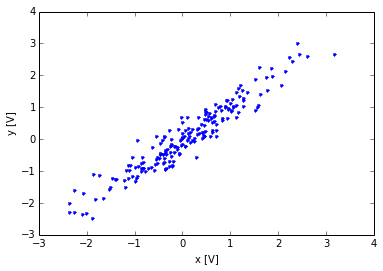

In [48]:
N=200
ntosig=0.3
x = np.random.randn(N)
y = x + np.random.randn(N)*ntosig
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.set_xlabel('x [V]');ax.set_ylabel('y [V]')

Of course if there are too many data points this can get quite messy:

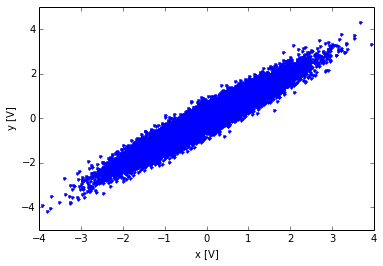

In [67]:
N=20000
ntosig=0.3
x = np.random.randn(N)
y = x + np.random.randn(N)*ntosig
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.set_xlabel('x [V]');ax.set_ylabel('y [V]')

An alternative is to contour or pseudo contour the data density in bins, just like we did histgrams for univariate data.  `matplotlib` provides a simple function for this.

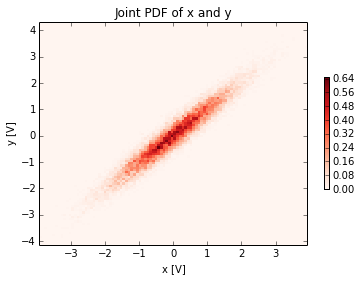

In [68]:
import matplotlib.cm as cm # import the colormaps.

fig,ax=plt.subplots(1,1)
(n,xx,yy,im)=ax.hist2d(x,y,bins=100,cmap=cm.Reds,cmin=0.,normed=True)
plt.colorbar(im,shrink=0.5)
ax.set_xlabel('x [V]');ax.set_ylabel('y [V]');ax.set_title('Joint PDF of x and y')

This is a little more helpful when there is so much data to look at. 

#### Approximate correlation co-efficient

This is calculated as you might expect:

\begin{equation}
      r_{xy} = \frac{s_{xy}}{s_xs_y} =\frac{1}{N-1}\frac{\sum_{i=1}^N (x_i-\overline{x})(y_i-\overline{y})}{s_xs_y}
\end{equation}

Note, of course, that $r_{xy}$ is a random variable, and therefore has a probability distribution function, means, and variances.  It therefore is subject to confidence intervals.

A clever person named Fisher figured out that if we consider the function of $r_{xy}=r$

\begin{equation}
    F(r)=\mathrm{arctanh}(r)
\end{equation}
then $F(r)$ approaches a Normal distribution as $N\to\infty$, with a standard devaition of $\sigma_F=\frac{1}{\sqrt{N-3}}$.

So, if we calculate $r$, then the 95% confidence interval for $F(r)$ is $\pm 1.96/\sqrt{N-3}$, and we can calculate the confidence intervals on $r$ by taking $\tanh\left(F(r)\pm1.96/\sqrt{N-3}\right)$.

Consider the following example with the data from above:

In [189]:
N=7000
ntosig=.2
x = np.random.randn(N);x=x-np.mean(x)
y = x + np.random.randn(N)*ntosig;y=y-np.mean(y)

r = np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)
print r
F = np.arctanh(r)
Fp95 = F+1.96/sqrt(N-3)
Fm95 = F-1.96/sqrt(N-3)
rp=np.tanh(Fp95)
rm=np.tanh(Fm95)
print "r= %1.3f (%1.3f,%1.3f)"%(r,rm,rp)

0.980732078786
r= 0.981 (0.980,0.982)


## Linear Regression

Suppose we have a linear process $y$ that depends on variable $x$.  Then $\tilde{y}=A+Bx$.  However, of course we have noise on any real measurements so we collect $y_k = \tilde{y}_k + \epsilon_k$ where $\epsilon_k$ is a noise process.  

So, suppose we measure $y_k$ $N$ times, and that we know $x_k$. **Linear regression** fits $y_k$ to a linear model as a function of $x$ that minimizes the magnitude of the noise.  To do this, we define the mean error as:

\begin{align}
    Q & \equiv  \sum_{i=1}^N \epsilon_i^2\\
        &=  \sum_{i=1}^N (y_i-a-bx_i)^2\\
\end{align}

<figure>
<IMG SRC="images/Regress.png" WIDTH=370  STYLE="padding-left:20px">
</figure>

So our fit for $A$ and $B$ will be $a$ and $b$.  We want to minimize $Q$, so we want
\begin{equation}
    \frac{\partial Q}{\partial a} =  \frac{\partial Q}{\partial b} = 0
\end{equation}
The first is easy:
\begin{align}
    0 & = \frac{\partial Q}{\partial a} \\
        &=  -\sum_{i=1}^N 2 (y_i-a-bx_i)\\
        &=  \overline{y}-a-b\overline{x}\\
\end{align}
or $a=\overline{y}-b\overline{x}$

The second is:
\begin{align}
    0 & = \frac{\partial Q}{\partial b} \\
        &=   -\sum_{i=1}^N 2 (y_i-a-bx_i)x_i\\
        &=  \sum_{i=1}^N  (y_i-\overline{y}+b\overline{x}-bx_i)x_i\\
\end{align}
So
\begin{align}
    b &= \frac{\sum_{i=1}^N  \left(y_i-\overline{y}\right)x_i} {\sum_{i=1}^N  \left(x_i-\overline{x}\right)x_i}\\
    &= \frac{\sum_{i=1}^N  x_iy_i-N\overline{x}\overline{y}} {\sum_{i=1}^N x_i^2-N\overline{x}^2}
\end{align}

It is worth noting that the fit line passes through the point $(\overline{x},\overline{y})$, so it is often helpful to simply remove the mean of x and y and minimize the error in the overdetermined equation:

\begin{equation}
    \mathbf{y} = b \mathbf{x}
\end{equation}

The same result ensues.  

The slope fit $b$ is a random variables, and as such has an uncertainty associated with it.  If $y$ given $x$ is Normally distributed, then the varaible 


\begin{equation}
    \left(b-E(b)\right) \left( \sum_{i=1}^N \left(x_i-\overline{x}\right)^2\right)^{1/2}
    = s_{y|x} t_{N-2}
\end{equation}

follows a student-t distribution with $N-2$ degrees of freedom, and standard devaition given by $s_{y|x}$, the sample standard deviation of the observed values about the prediction:

\begin{equation}
     s_{y|x} = \left[\frac{\sum_{i=1}^N \left( y_i-\tilde{y}_i \right)^2 }{N-2} \right]^{1/2}
\end{equation}

Note that it is really only $b$ that is truly random, because no matter what the fit it passes through $\overline{x},\overline{y}$, so $a$ changes to make that happen.  



### Example from above

Just using the data from above, we can perform a linear regression.  What do we expecr the values of $b$ and $a$ to be?

7000
Slope b is between 0.994306 and 1.003632 with 95% probability


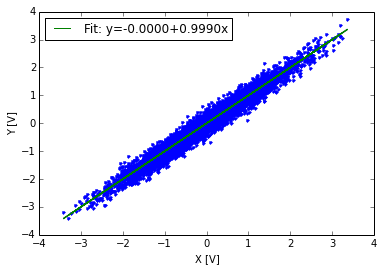

In [191]:
print N
b = np.sum(x*y)-N*np.mean(x)*np.mean(y)
b = b/(np.sum(x**2)-N*np.mean(x)**2)
a = np.mean(y)-b*np.mean(x)
yhat=b*x+a

fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.plot(x,yhat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('X [V]');ax.set_ylabel('Y [V]');

# get the error bounds...
syx=np.sqrt(np.sum((y-yhat)**2)/(N-2))
import scipy.stats as stats

bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((x-np.mean(x))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
xx=np.sort(x)
yhathigh=(b+bb[1])*(xx-np.mean(x))+np.mean(y)
yhatlow=(b+bb[0])*(xx-np.mean(x))+np.mean(y)
ax.fill_between(xx,yhathigh,yhatlow,alpha=0.4)

This conforms to our expectation based on how y was made.  Of course if we had far less data, and the noise was larger, the confidence in the slope would be poorer.

20
Slope b is between 0.756169 and 1.150240 with 95% probability


((-4.0, 4.0), (-4.0, 4.0))

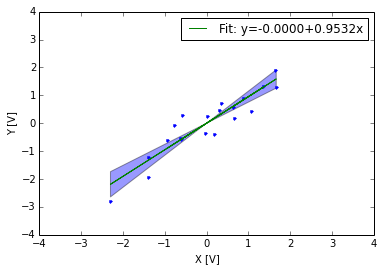

In [203]:
N=20
ntosig=.4
np.random.seed(456)
x = np.random.randn(N);x=x-np.mean(x)
np.random.seed(986)
y = x + np.random.randn(N)*ntosig;y=y-np.mean(y)
np.random.seed()

print N
b = np.sum(x*y)-N*np.mean(x)*np.mean(y)
b = b/(np.sum(x**2)-N*np.mean(x)**2)
a = np.mean(y)-b*np.mean(x)
yhat=b*x+a

fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.plot(x,yhat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('X [V]');ax.set_ylabel('Y [V]');

# get the error bounds...
syx=np.sqrt(np.sum((y-yhat)**2)/(N-2))
import scipy.stats as stats
bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((x-np.mean(x))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
xx=np.sort(x)
yhathigh=(b+bb[1])*(xx-np.mean(x))+np.mean(y)
yhatlow=(b+bb[0])*(xx-np.mean(x))+np.mean(y)
ax.fill_between(xx,yhathigh,yhatlow,alpha=0.4)
ax.set_xlim([-4.,4.]),ax.set_ylim([-4.,4.])

### Quantifying the goodness of fit

Determining if any model is a "good fit" is somewhat subjective, and certainly depends on your data and your model.  Obviously, if we fit a straight line to two data points the fit is perfect, but the result is meaningless unless we are sure there is no error in those two data points.  

The **Linear Correlation Co-efficient** is often denoted $R^2$, and for $x$ and $y$ with zero mean is given by:

\begin{equation}
    R^2 = \frac{\left(\sum xy \right)^2}{\sum x^2 \sum y^2}
\end{equation}

and is the same as the correlation co-efficient given above.  Note that this can be calculated without recourse to the fitting of the linear model, and as we discussed gives the fraction of the data that is linearly correlated between the two data populations.

The **Standard Error** is simply the error in the slope described above.

However, there is a problem.  What happens if we have a big outlier?

20
Slope b is between 7.917030 and 8.603723 with 95% probability


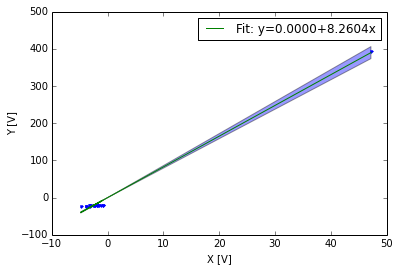

In [236]:
N=20
ntosig=.4
np.random.seed(456)

x = np.random.randn(N);
x[0]=50.
x=x-np.mean(x)
np.random.seed(986)
yy= np.random.randn(N)*ntosig;
yy[0]=yy[0]*1000.
y = x +yy
y=y-np.mean(y)
np.random.seed()

print N
b = np.sum(x*y)-N*np.mean(x)*np.mean(y)
b = b/(np.sum(x**2)-N*np.mean(x)**2)
a = np.mean(y)-b*np.mean(x)
yhat=b*x+a

fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.plot(x,yhat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('X [V]');ax.set_ylabel('Y [V]');

# get the error bounds...
syx=np.sqrt(np.sum((y-yhat)**2)/(N-2))
import scipy.stats as stats
bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((x-np.mean(x))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
xx=np.sort(x)
yhathigh=(b+bb[1])*(xx-np.mean(x))+np.mean(y)
yhatlow=(b+bb[0])*(xx-np.mean(x))+np.mean(y)
ax.fill_between(xx,yhathigh,yhatlow,alpha=0.4)
#ax.set_xlim([-4.,4.]),ax.set_ylim([-4.,4.])

Hopefully a good data analyst would look at this plot and decide that the fit, while good to the outlier and the center of the true data cloud, is dominating the linear fit.  There is no standard "goodness of fit" that will magically tell you if this point is useful or not, or if it deserves to skew all your data.

This point of course violates the asumption that $y_i-\tilde{y}_i$ is normally distributed.  One way to check this would be to **Bootstrap** the data.

### Bootstrapped slope estimates

Bootstrapping is a very useful statistical technique that allows us to tease out statistical relationships that make no assumptions about the underlying statistics.  

In the  case above we don't know that the outlier violates our underlying assumptions.  However, we can plot it and see it is an outlier pretty easily.  We can also think about what would happen if we fit only 1/3 of the data a bunch of random times, and see what the resulting distribution of the slope $b$ is.  We might expect $b$ to have a binomial distribution in that case, $b\approx 1$ where the outlier is not in the data, and $b\approx 10$ when the outlier is there.  

To perform the bootstrap we take a random subsample of our data of length $N/3$ for instance, and we recalculate the slope a few hundred times:

In [257]:
# do the bootstrap:
Nboot=1000
print N
Nsub=np.floor(N/3)
bs=zeros(Nboot)

for i in range(Nboot):
    inds=np.random.rand(Nsub)
    inds = np.floor(inds*N).astype(int)
    b = np.sum(x[inds]*y[inds])-Nsub*np.mean(x[inds])*np.mean(y[inds])
    b = b/(np.sum(x[inds]**2)-Nsub*np.mean(x[inds])**2)
    bs[i]=b

20


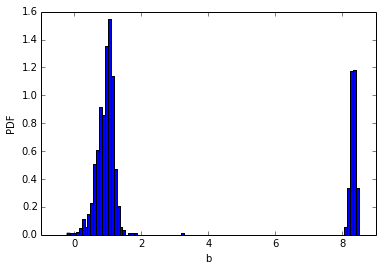

In [258]:
fig,ax=plt.subplots(1,1)
ax.hist(bs,100,normed=True);
ax.set_xlabel('b')
ax.set_ylabel('PDF')

So, we see two things.  First is that the distribution of $b$ is indeed binomial, with a mode near 8.5, an a second near 1.  We can also see that the distribution of $b$ around those two modes does look Normal, or close to it.  